### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [144]:
data = pd.read_csv('data/coupons.csv')

In [145]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

We take a look at the unique values in the datasets to see if we can get an idea of what columns/rows needs to be cleaned.

In [146]:
print(data.apply(lambda x: x.unique()))
# Taking loser look at cut columns...
print('\n Coupon: \n', set(data['coupon']))
print('\n maritalStatus: \n', set(data['maritalStatus']))
print('\n education: \n', set(data['education']))
print('\n occupation: \n', set(data['occupation']))
print('\n income: \n', set(data['income']))
print('\n car: \n', set(data['car']))

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

3. Decide what to do about your missing data -- drop, replace, other...

Columns with nan: **Bar**, **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20**, **Restaurant20To50**, **car**

We'll first count how many cells would be removed if we drop the *nan*, if a large portion of the database is dropped then we'll lose statistical significance. In that case it would be wiser to only drop those rows when the data for those columns is relevant. 

In [147]:
print("Nan sum:\n", data.isnull().sum(axis = 0))
print("\nEntry sum:\n", data.count())

Nan sum:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Entry sum:
 destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expi

We see that there are relativeley few entries for **car**, so we will drop that column entirely. Additionally, we see there are relativley few entries with *nan* for **Bar**, **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20**, **Restaurant20To50**, so we will drop those rows specifically.

In [148]:
filtered_data = data.drop(['car'], axis=1)
filtered_data = filtered_data.dropna()
print("Nan sum:\n", filtered_data.isnull().sum(axis = 0))
print("\nEntry sum:\n", filtered_data.count())

Nan sum:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Entry sum:
 destination             12079
passanger               12079
weather                 12079
temperature             12079
time                    12079
coupon                  12079
expiration              12079
gender                  12079
age                     12079
maritalStatus           12079
has_children  

4. What proportion of the total observations chose to accept the coupon? 



In [149]:
print(f'{filtered_data.Y.sum()/len(filtered_data)*100}% of total observations chose to accept the coupon.')

56.93352098683666% of total observations chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

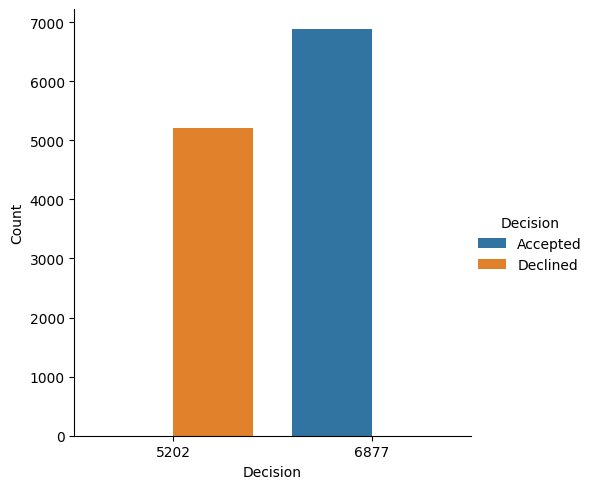

In [150]:
coupon_count = pd.DataFrame(filtered_data["Y"].value_counts())
coupon_count["Decision"] = ['Accepted', 'Declined']

ax = sns.catplot(kind="bar", x="Y", y="Y", data=coupon_count, hue="Decision")
ax.set(xlabel='Decision', ylabel='Count')

6. Use a histogram to visualize the temperature column.

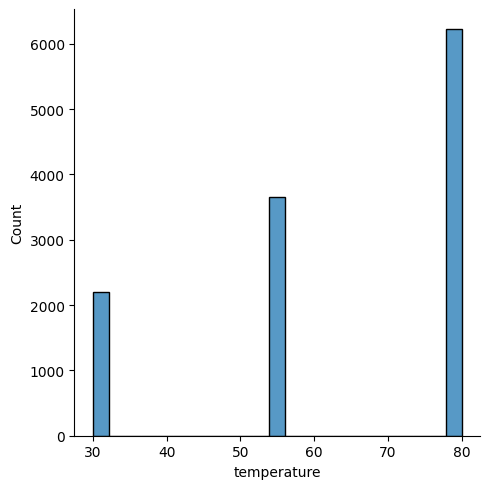

In [151]:
sns.displot(data=filtered_data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [152]:
bar_data = filtered_data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [153]:
print(f'{bar_data.Y.sum()/len(bar_data)*100}% of bar coupons where accepted.')

41.19184526921067% of bar coupons where accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [154]:
#people who went to the bar 3 or less times
leq3 = bar_data.query('Bar in ["never", "less1", "1~3"]')
leq3_accepted = leq3.query('Y == True')

leq3_rate = len(leq3_accepted)/len(leq3)*100

#people who went to the bar more than 3 times
gt3 = bar_data.query('Bar not in ["never", "less1", "1~3"]')
gt3_accepted = gt3.query('Y == True')

gt3_rate = len(gt3_accepted)/len(gt3)*100

print(f'''Those who frequent the bar 3 or fewer times per month accepted the bar coupons {leq3_rate}% of the 
time compared to those who frequented more at a {gt3_rate}% acceptance rate.
''')

Those who frequent the bar 3 or fewer times per month accepted the bar coupons 37.26744186046512% of the 
time compared to those who frequented more at a 76.16580310880829% acceptance rate.



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [155]:
# we filter again by those who go to the bar more than once
drivers_gt1 = bar_data.query('Bar not in ["never", "less1"]')

# we filter one more time by those over the age of 25
drivers_gt1_gt25yo = drivers_gt1.query('age != "21"')

# everyone else
everyone_else = pd.concat([bar_data, drivers_gt1_gt25yo]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_gt25yo_acceptance_rate = len(drivers_gt1_gt25yo.query('Y == True'))/len(drivers_gt1_gt25yo)*100

print(f'''Drivers who go to the bar more than once a month and are over the age of 25 
have an acceptance rate of {drivers_gt1_gt25yo_acceptance_rate}% compared to everyone 
else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who go to the bar more than once a month and are over the age of 25 
have an acceptance rate of 68.28087167070218% compared to everyone 
else at 33.64737550471063% acceptance.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [156]:
# we filter again by those who go to the bar more than once
drivers_gt1 = bar_data.query('Bar not in ["never", "less1"]')

# we apply another filter for those who have passengers that weren't kids
drivers_gt1_adult_passanger = drivers_gt1.query('passanger not in ["Kid(s)", "Alone"]')

# lastly, we apply the filter to those with an occupation other than farming, fishing, forestry
drivers_gt1_adult_passanger_occupation = drivers_gt1_adult_passanger.query('occupation not in ["farming", "fishing", "forestry"]')

# everyone else
everyone_else = pd.concat([bar_data, drivers_gt1_adult_passanger_occupation]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_adult_passanger_occupation_rate = len(drivers_gt1_adult_passanger_occupation.query('Y == True'))/len(drivers_gt1_adult_passanger_occupation)*100

print(f'''Drivers who go to the bar more than once a month, had passangers that weren't kids 
and occupations other than farming, fishing and forestry have an acceptance rate of 
{drivers_gt1_adult_passanger_occupation_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')

Drivers who go to the bar more than once a month, had passangers that weren't kids 
and occupations other than farming, fishing and forestry have an acceptance rate of 
71.42857142857143% compared to everyone else at 37.836257309941516% acceptance.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [157]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

# we filter again by those who go to the bar more than once
drivers_gt1 = bar_data.query('Bar not in ["never", "less1"]')

# we apply another filter for those who have passengers that weren't kids
drivers_gt1_adult_passanger = drivers_gt1.query('passanger not in ["Kid(s)", "Alone"]')

# lastly, we apply filter to those that weren't windowed
drivers_gt1_adult_passanger_not_widowed = drivers_gt1_adult_passanger.query('maritalStatus != "Widowed"')

# acceptance rate - everyone else
everyone_else = pd.concat([bar_data, drivers_gt1_adult_passanger_not_widowed]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_adult_passanger_not_widowed_rate = len(drivers_gt1_adult_passanger_not_widowed.query('Y == True'))/len(drivers_gt1_adult_passanger_not_widowed)*100

print(f'''Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed have an acceptance rate of 
{drivers_gt1_adult_passanger_not_widowed_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed have an acceptance rate of 
71.42857142857143% compared to everyone else at 37.836257309941516% acceptance.


In [158]:
# go to bars more than once a month and are under the age of 30 

# we already have the bar filter as drivers_gt1

# we apply the filter for those below the age of 30
drivers_gt1_lt30 = drivers_gt1.query('age not in ["26", "21", "below21"]')

# acceptance rate - everyone else
everyone_else = pd.concat([bar_data, drivers_gt1_lt30]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
drivers_gt1_lt30_rate = len(drivers_gt1_lt30.query('Y == True'))/len(drivers_gt1_lt30)*100

print(f'''Drivers who go to bars more than once a month and are under the age of 30 have an acceptance rate of 
{drivers_gt1_lt30_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who go to bars more than once a month and are under the age of 30 have an acceptance rate of 
63.934426229508205% compared to everyone else at 37.82477341389728% acceptance.


In [159]:
# go to cheap restaurants more than 4 times a month with an income less than 50K

# go to cheap restarants more than 4 times a month
cheap_res_gt4 = bar_data.query('RestaurantLessThan20 not in ["1~3", "less1", "never"]')

# income less than 50k
cheap_res_gt4_lt50k = cheap_res_gt4.query('income not in ["$25000 - $37499", "Less than $12500", "$37500 - $49999", "$12500 - $24999"]')

# acceptance rate - everyone else
everyone_else = pd.concat([bar_data, cheap_res_gt4_lt50k]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
cheap_res_gt4_lt50k_rate = len(cheap_res_gt4_lt50k.query('Y == True'))/len(cheap_res_gt4_lt50k)*100

print(f'''Drivers who go to cheap restaurants more than 4 times a month with an income less than 50K have an acceptance rate of 
{cheap_res_gt4_lt50k_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who go to cheap restaurants more than 4 times a month with an income less than 50K have an acceptance rate of 
40.64837905236908% compared to everyone else at 41.28989361702128% acceptance.


We find that the acceptance rate falls in the order that they appear:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed **AT ~71% acceptance**
- go to bars more than once a month and are under the age of 30 **AT ~64% acceptance**
- go to cheap restaurants more than 4 times a month and income is less than 50K **AT ~ 40% acceptance**


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

People under 30 like to go to bars with friends and often take advantage of the coupons, lower income people are deterred either way. It's hard to make observations here as these filters do not build off of each other.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Let's see if going in the same direction as a coffee house has a greater impact for coupon acceptance than sunny weather:**
- Coffee house coupon acceptance rate for drivers going in the same direction.
- Coffee house coupone acceptance rate for drivers in sunny weather.

In [160]:
# filter for coffee house coupon
coffee_data = filtered_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_same_dir = coffee_data.query('direction_same == 1')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_same_dir]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_same_dir_rate = len(coffee_same_dir.query('Y == True'))/len(coffee_same_dir)*100

print(f'''Drivers who are going in the same direction as a Coffee House have a coupon acceptance rate
{coffee_same_dir_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who are going in the same direction as a Coffee House have a coupon acceptance rate
52.6536312849162% compared to everyone else at 48.80181347150259% acceptance.


In [161]:
# filter for coffee house coupon
coffee_data = filtered_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_weather = coffee_data.query('weather == "Sunny"')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_weather]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_weather_rate = len(coffee_weather.query('Y == True'))/len(coffee_weather)*100

print(f'''Drivers in sunny weather accept Coffee House coupons with an acceptance rate
{coffee_weather_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers who are going in the same direction as a Coffee House have a coupon acceptance rate
50.090470446320865% compared to everyone else at 46.787148594377506% acceptance.


Since both the direction and weather have almost coin flip for coupon acceptance rate at Coffee Houses, we can assume that neither really has a large impact. However, we can check to see if bad weather might have an impact.

- Coffee house coupone acceptance rate for drivers in snowy weather.
- Coffee house coupone acceptance rate for drivers in rainy weather.

In [162]:
# filter for coffee house coupon
coffee_data = filtered_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_weather = coffee_data.query('weather == "Snowy"')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_weather]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_weather_rate = len(coffee_weather.query('Y == True'))/len(coffee_weather)*100

print(f'''Drivers in snowy weather accept Coffee House coupons with an acceptance rate
{coffee_weather_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers in snowy weather accept Coffee House coupons with an acceptance rate
42.80701754385965% compared to everyone else at 50.014208581983524% acceptance.


In [163]:
# filter for coffee house coupon
coffee_data = filtered_data.query('coupon == "Coffee House"')

# Coffee house coupon acceptance rate for drivers going in the same direction.
coffee_weather = coffee_data.query('weather == "Rainy"')

# acceptance rate - everyone else
everyone_else = pd.concat([coffee_data, coffee_weather]).drop_duplicates(keep=False)

# rates
everyone_else_acceptance_rate = len(everyone_else.query('Y == True'))/len(everyone_else)*100
coffee_weather_rate = len(coffee_weather.query('Y == True'))/len(coffee_weather)*100

print(f'''Drivers in snowy weather accept Coffee House coupons with an acceptance rate
{coffee_weather_rate}% compared to everyone else at {everyone_else_acceptance_rate}% acceptance.''')


Drivers in snowy weather accept Coffee House coupons with an acceptance rate
51.627906976744185% compared to everyone else at 49.3727348759409% acceptance.


We can conclude that neither direction and weather have much of an impact for drivers that accept Coffee House coupons except for those driving in snowy weather. We would imagine in snowy weather all coupon accepts rates would be lower. There is probably another factor that effects Coffee House coupon rates, but it's none of these.